In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '../data/'
df = pd.read_csv(path+'/bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df[(df['job'] == 'unknown') | (df['education'] == 'unknown') | (df['contact'] == 'unknown')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,55,services,divorced,secondary,no,2166,yes,no,unknown,28,may,23,17,-1,0,unknown,no
11144,60,retired,married,secondary,no,0,yes,no,unknown,15,may,229,1,-1,0,unknown,no
11148,32,blue-collar,married,secondary,no,1,yes,no,unknown,8,may,102,1,-1,0,unknown,no
11151,40,management,married,tertiary,no,917,yes,no,unknown,20,may,292,1,-1,0,unknown,no


In [6]:
df[(df['job'] == 'unknown') | (df['education'] == 'unknown') | (df['contact'] == 'unknown')].shape[0]/df.shape[0]

0.2480738218957176

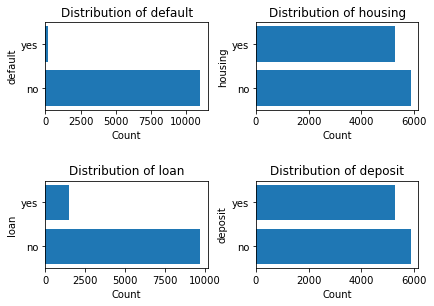

In [7]:
fig, axes = plt.subplots(2,2)
fig.tight_layout(h_pad=5)

bin_list = [4,6,7,16]

for i in range(1,5):
    plt.subplot(2, 2, i)
    n = bin_list[i-1]
    counts = df[list(df.columns)[n]].value_counts()
    plt.barh(y=counts.index, width=counts)
    plt.title('Distribution of '+list(df.columns)[n])
    plt.ylabel(list(df.columns)[n])
    plt.xlabel('Count')

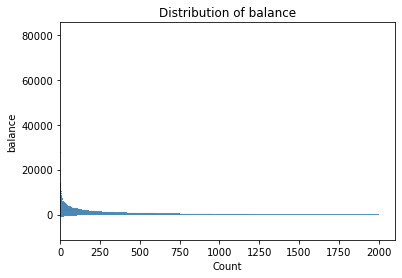

In [8]:
sns.histplot(df, y='balance');
plt.title('Distribution of balance');

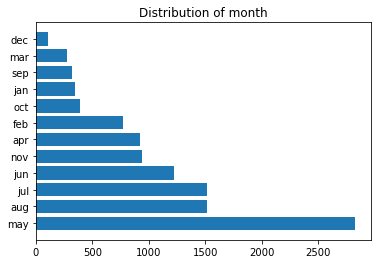

In [20]:
plt.barh(width=df['month'].value_counts().values, y=df['month'].value_counts().index);
plt.title('Distribution of month');

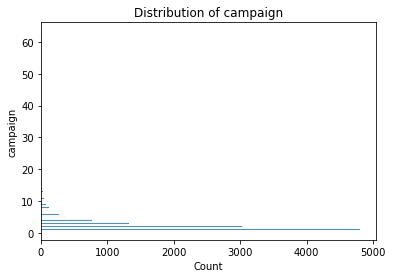

In [29]:
sns.histplot(df, y='campaign');
plt.title('Distribution of campaign');

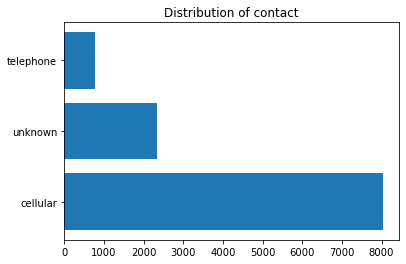

In [19]:
plt.barh(width=df['contact'].value_counts().values, y=df['contact'].value_counts().index);
plt.title('Distribution of contact');

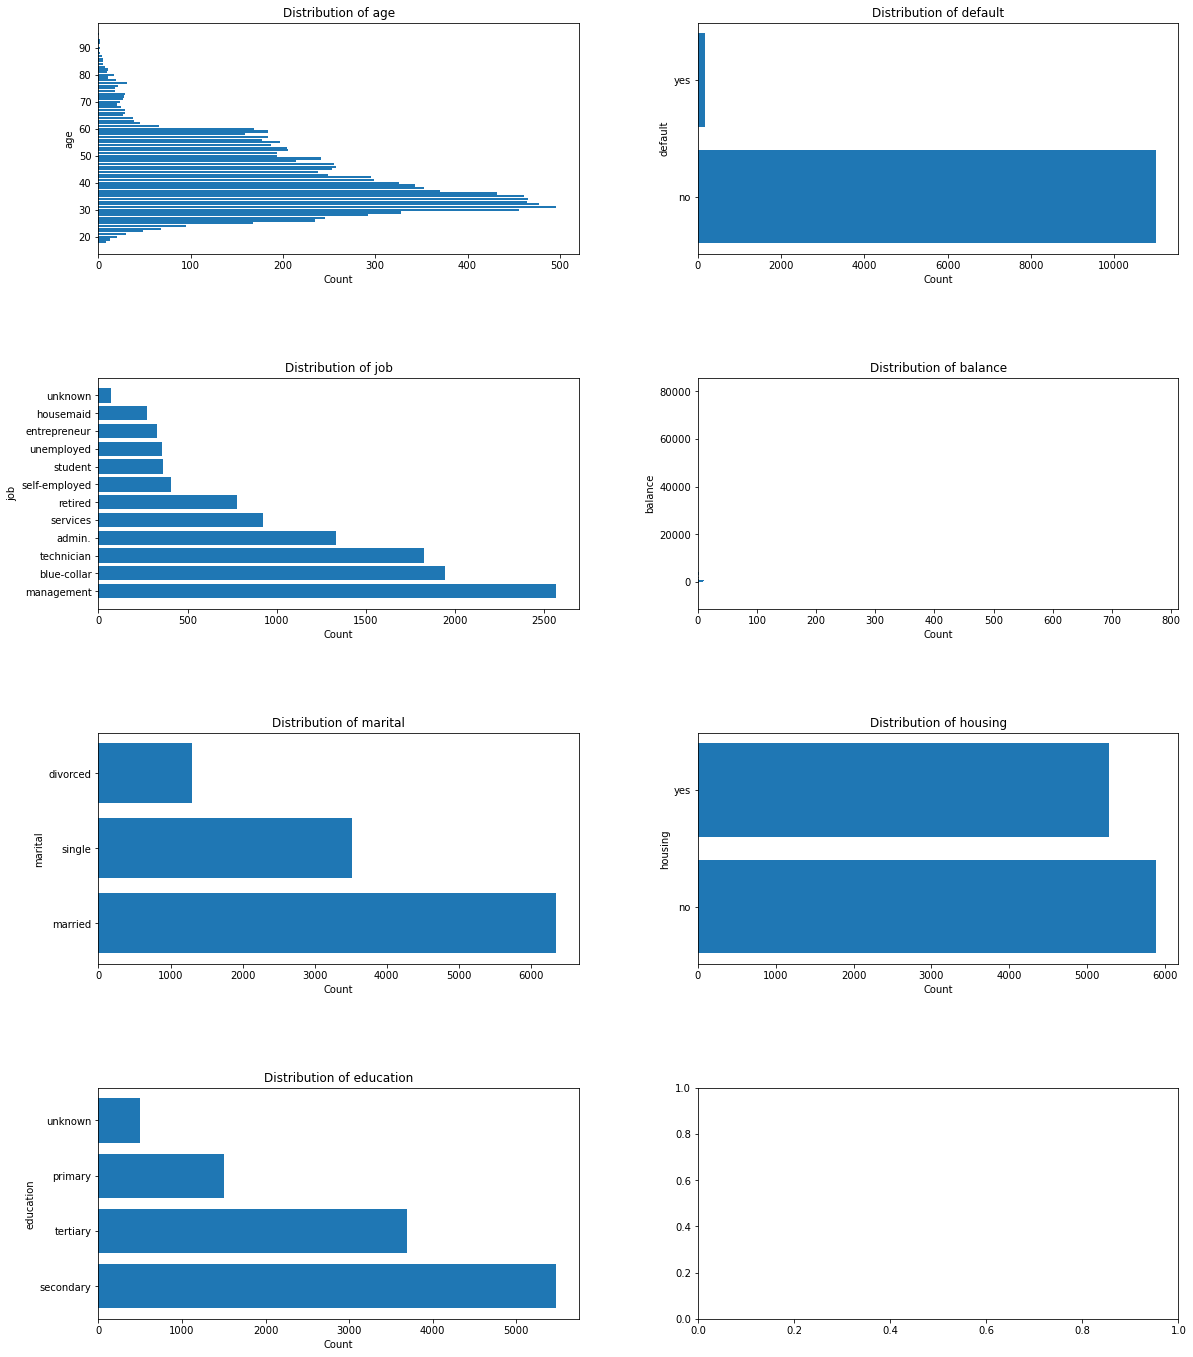

In [10]:
fig, axes = plt.subplots(4,2)
fig.tight_layout(h_pad=.25)

j = 0
k = 0 
for i in range(1,8):
    if k==4:
        k=0
        j=1
    plt.subplot2grid((4, 2), (k,j))
    n = i-1
    counts = df[list(df.columns)[n]].value_counts()
    plt.barh(y=counts.index, width=counts)
    plt.title('Distribution of '+list(df.columns)[n])
    plt.ylabel(list(df.columns)[n])
    plt.xlabel('Count')
    k=k+1
                     
plt.subplots_adjust(left=.25, bottom=.5, right=2.75, top=5)